In [86]:
import pandas as pd
import random
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [69]:
# read original dataset
alldata_df = pd.read_csv('all_data.csv')
alldata_df = alldata_df[['Genre','Working Memory ONLY']]
groups = alldata_df.groupby('Genre').count().reset_index().rename(columns={'Working Memory ONLY':'number_of_values'})


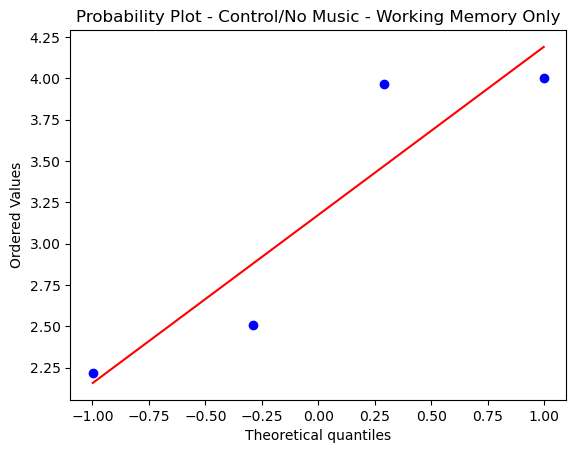

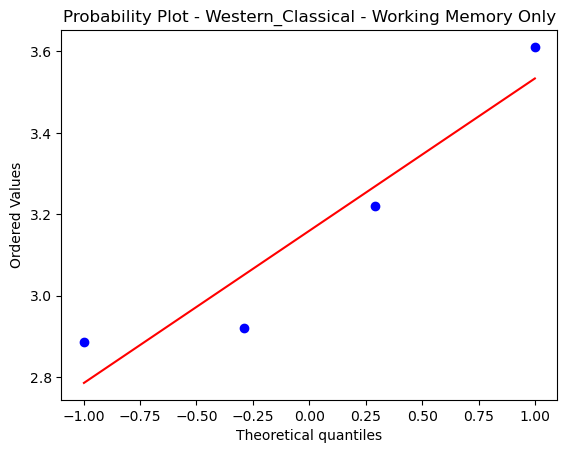

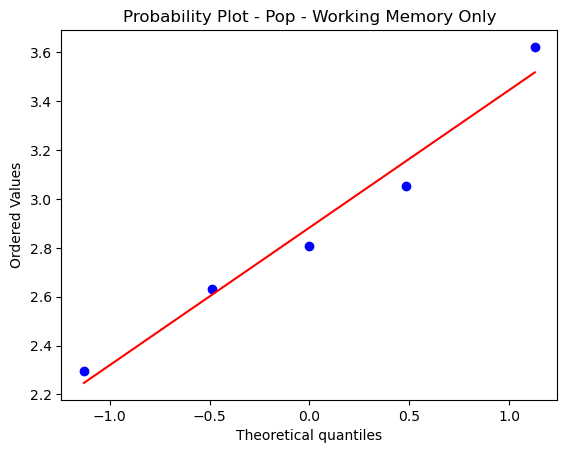

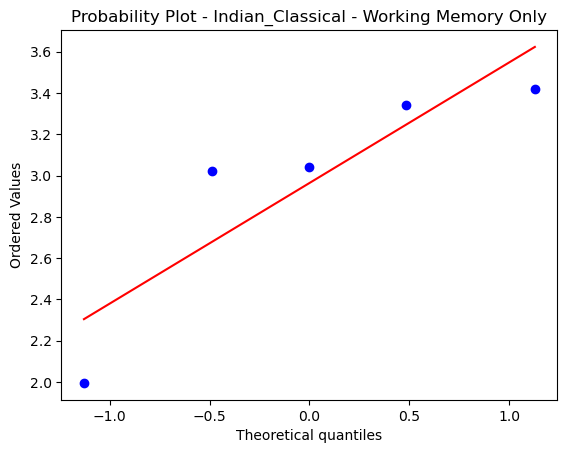

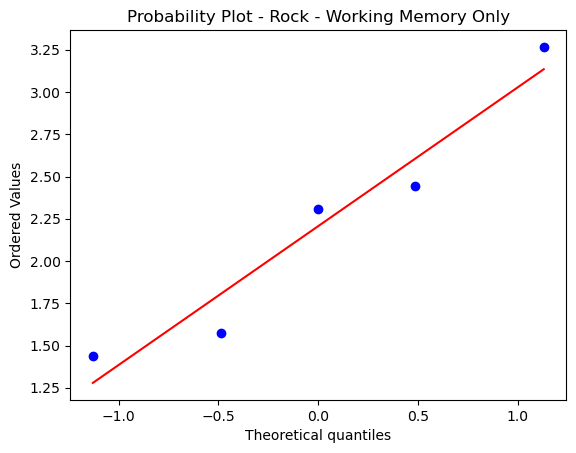

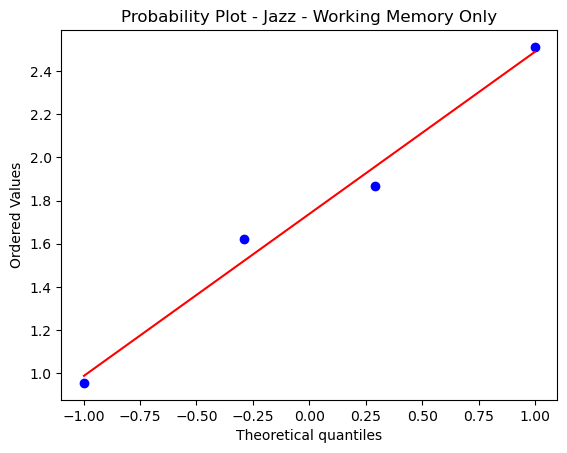

In [100]:
#Normality Check using plots
Genrelist = alldata_df['Genre'].unique()
for Genre in Genrelist:
    stats.probplot(alldata_df[alldata_df['Genre'] == Genre]['Working Memory ONLY'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  Genre + " - Working Memory Only")
    plt.show()

In [99]:
# calculate ratio of the largest to the smallest sample standard deviation
ratio = alldata_df.groupby('Genre').std().max() / alldata_df.groupby('Genre').std().min()
ratio



print('''Homogeneity of Variance Test: 
Ratio of max standard deviation to 
min standard deviation for''', 
      ratio)


Homogeneity of Variance Test: 
Ratio of max standard deviation to 
min standard deviation for Working Memory ONLY    2.801242
dtype: float64


In [72]:
x = '''
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table
'''
x = x.replace("major","Genre").replace("salary","Working Memory ONLY").replace("sample_df","alldata_df")
print(x)


# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = alldata_df['Working Memory ONLY'].mean()
SSTR = alldata_df.groupby('Genre').count() * (alldata_df.groupby('Genre').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Working Memory ONLY'].sum()

# calculate SSE and update anova table
SSE = (alldata_df.groupby('Genre').count() - 1) * alldata_df.groupby('Genre').std()**2
anova_table['SS']['Within Groups'] = SSE['Working Memory ONLY'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Working Memory ONLY'].sum() + SSE['Working Memory ONLY'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups

In [98]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Working Memory Scores: Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Working Memory Scores: Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = alldata_df['Working Memory ONLY'].mean()
SSTR = alldata_df.groupby('Genre').count() * (alldata_df.groupby('Genre').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['Working Memory ONLY'].sum()

# calculate SSE and update anova table
SSE = (alldata_df.groupby('Genre').count() - 1) * alldata_df.groupby('Genre').std()**2
anova_table['SS']['Within Groups'] = SSE['Working Memory ONLY'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['Working Memory ONLY'].sum() + SSE['Working Memory ONLY'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = alldata_df['Genre'].nunique() - 1
anova_table['df']['Within Groups'] = alldata_df.shape[0] - alldata_df['Genre'].nunique()
anova_table['df']['Total'] = alldata_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05

anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Working Memory Scores: Source of Variation,,,,,,
Between Groups,7.169465,5,1.433893,3.459812,0.019492,2.684781
Within Groups,8.703291,21,0.414442,,,
Total,15.872755,26,0.610491,,,


In [84]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("p-value cutoff: 0.05")
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
p-value cutoff: 0.05
F-score is: 3.4598122915018488  and p value is: 0.019491608816136763
Null Hypothesis is rejected.


In [97]:
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=alldata_df['Working Memory ONLY'], groups=alldata_df['Genre'], alpha=0.05)
print('''                        For Working Memory Scores: 
''', m_comp)


                        For Working Memory Scores: 
            Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2      meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------
Control/No Music  Indian_Classical  -0.2099 0.9962  -1.561  1.1412  False
Control/No Music              Jazz  -1.4356 0.0475 -2.8597 -0.0114   True
Control/No Music               Pop  -0.2912 0.9829 -1.6423  1.0598  False
Control/No Music              Rock  -0.9672  0.262 -2.3183  0.3838  False
Control/No Music Western_Classical  -0.0145    1.0 -1.4386  1.4097  False
Indian_Classical              Jazz  -1.2256 0.0898 -2.5767  0.1254  False
Indian_Classical               Pop  -0.0813 0.9999 -1.3551  1.1924  False
Indian_Classical              Rock  -0.7573 0.4519 -2.0311  0.5165  False
Indian_Classical Western_Classical   0.1955 0.9973 -1.1556  1.5465  False
            Jazz               Pop   1.1443 0.1287 -0.2067 

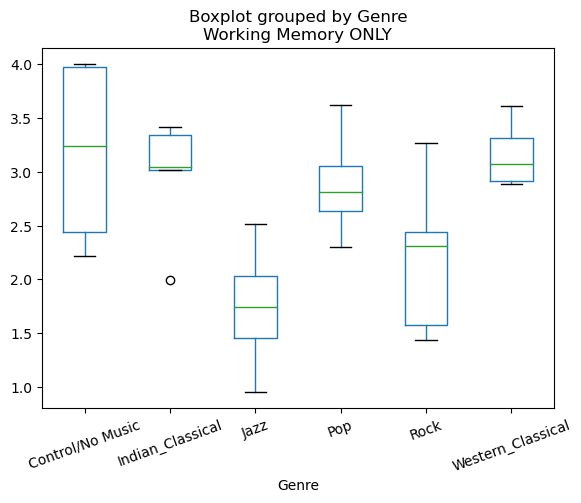

In [75]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_normal = df.copy()
    # apply the z-score method
    for column in df.columns:
        if column == "Working Memory ONLY":
            df_normal[column] = (df_normal[column] - df_normal[column].mean()) / df_normal[column].std()
        else: 
            pass
        
    return df_normal
    
#call the z_score function ((NOPE)


def readdatacsv(filenamestring):
    df = pd.read_csv(filenamestring)
    a = df.columns[0]
    b = df.columns[3]
    df = df[[a,b]]
    return df

jazzdata_df = readdatacsv("jazz_data.csv")
controldata_df = readdatacsv("control_nm_data.csv")
icdata_df = readdatacsv("ic_data.csv")
wcdata_df = readdatacsv("wc_data.csv")
popdata_df = readdatacsv("pop_data.csv")
rockdata_df = readdatacsv("rock_data.csv")

mydict = {"Control/No Music":controldata_df, "Indian Classical":icdata_df, "Jazz":jazzdata_df, "Pop":popdata_df, "Rock":rockdata_df, "Western Classical":wcdata_df, "All Data":alldata_df}
#for key, value in mydict.items():
   # print("for genre: ", key)
    #display(value)


alldataplot = alldata_df.boxplot(by ='Genre', column =['Working Memory ONLY'], grid = False)
alldataplot.plot()
plt.xticks(rotation = 20) # Rotates X-Axis Ticks by 45-degrees
plt.show()

In [76]:
def myttest(treatmentdata, controldata, workingmemoryscore):
    print("Mean of treatment data: ", treatmentdata[workingmemoryscore].mean())
    print("Mean of control data: ", controldata[workingmemoryscore].mean())
    print("Variance of treatment data: ", treatmentdata[workingmemoryscore].var())
    print("Variance of control data: ", controldata[workingmemoryscore].var())
    testresults = ttest_ind(treatmentdata[workingmemoryscore], controldata[workingmemoryscore], equal_var=False)
    return testresults
#Last two lines tell function to remember what t test values are so that I can put htem in a variable later

In [77]:
#variable jazzttestresults captures stored value and printed sentences   
jazzttestresults = myttest(jazzdata_df, controldata_df, "Working Memory ONLY") 
print(jazzttestresults)

Mean of treatment data:  1.73835
Mean of control data:  3.1739
Variance of treatment data:  0.41344019
Variance of control data:  0.887707753333333
Ttest_indResult(statistic=-2.5170102224899242, pvalue=0.05069261651788608)


In [78]:
wcttestresults = myttest(wcdata_df, controldata_df, "Working Memory ONLY")
print(wcttestresults)

Mean of treatment data:  3.15945
Mean of control data:  3.1739
Variance of treatment data:  0.11312763000000003
Variance of control data:  0.887707753333333
Ttest_indResult(statistic=-0.028887936268687586, pvalue=0.978424361129203)


In [79]:
icttestresults = myttest(icdata_df, controldata_df, "Working Memory ONLY")
print(icttestresults)

Mean of treatment data:  2.9639999999999995
Mean of control data:  3.1739
Variance of treatment data:  0.3245052599999999
Variance of control data:  0.887707753333333
Ttest_indResult(statistic=-0.39192383274292864, pvalue=0.7122181482717962)


In [80]:
popttestresults = myttest(popdata_df, controldata_df, "Working Memory ONLY")
print(popttestresults)

Mean of treatment data:  2.88266
Mean of control data:  3.1739
Variance of treatment data:  0.24670540299999993
Variance of control data:  0.887707753333333
Ttest_indResult(statistic=-0.5591801219956767, pvalue=0.6037551819019868)


In [81]:
rockttestresults = myttest(rockdata_df, controldata_df, "Working Memory ONLY")
print(rockttestresults)

Mean of treatment data:  2.20668
Mean of control data:  3.1739
Variance of treatment data:  0.543905297
Variance of control data:  0.887707753333333
Ttest_indResult(statistic=-1.6819106449730312, pvalue=0.14669066328725494)


In [82]:
#NEEDS VALUES TO BE CHANGED!!!!!
data = [["Jazz vs Control", '-2.5170102224899242', '0.05069261651788608' ],
        ["Rock vs Control", '-1.6819106449730312', '0.14669066328725494' ], 
        ["WC vs Control", '-0.028887936268687586', '0.978424361129203' ], 
        ["IC vs Control", '-0.39192383274292864', '0.7122181482717962' ], 
        ["Pop vs Control", '-0.5591801219956767', '0.6037551819019868' ]]
ttest_table = pd.DataFrame(data, columns = ["Working Memory: Treatment Data to Control Data","t-statistic", "p-value"])
ttest_table.set_index('Working Memory: Treatment Data to Control Data', inplace = True)
ttest_table

,t-statistic,p-value
Working Memory: Treatment Data to Control Data,,
Jazz vs Control,-2.5170102224899242,0.05069261651788608
Rock vs Control,-1.6819106449730312,0.14669066328725494
WC vs Control,-0.028887936268687586,0.978424361129203
IC vs Control,-0.39192383274292864,0.7122181482717962
Pop vs Control,-0.5591801219956767,0.6037551819019868


In [101]:
data = [['Control/No Music', '', '', '', '', '', '', '', ''], ['Indian Classical', '', '', '', '', '', '', '', ''], ['Jazz', '', '', '', '', '', '', '', ''], ['Pop', '', '', '', '', '', '', '', ''], ['Rock', '', '', '', '', '', '', '', ''],['Western Classical', '', '', '', '', '', '', '', ''], ['All Data', '', '', '', '', '', '', '', ''] ] 
desc_stats_table = pd.DataFrame(data, columns = ['Genre', 'Count','Mean', 'STD', 'Min','Q1','Median','Q3', 'Max']) 
desc_stats_table.set_index('Genre', inplace = True)

for key in mydict.keys():
#update count value for each genre
    genrecount = mydict[key]["Working Memory ONLY"].count()
    desc_stats_table["Count"][key] = genrecount    
#update mean in table
    genrecount = mydict[key]["Working Memory ONLY"].mean()
    desc_stats_table["Mean"][key] = genrecount
#update std
    genrecount = mydict[key]["Working Memory ONLY"].std()
    desc_stats_table["STD"][key] = genrecount
#update min
    genrecount = mydict[key]["Working Memory ONLY"].min()
    desc_stats_table["Min"][key] = genrecount
#Q1
    genrecount = mydict[key]["Working Memory ONLY"].quantile(q=0.25)
    desc_stats_table["Q1"][key] = genrecount
#Median
    genrecount = mydict[key]["Working Memory ONLY"].quantile(q=0.5)
    desc_stats_table["Median"][key] = genrecount
#Q3
    genrecount = mydict[key]["Working Memory ONLY"].quantile(q=0.75)
    desc_stats_table["Q3"][key] = genrecount
#max
    genrecount = mydict[key]["Working Memory ONLY"].max()
    desc_stats_table["Max"][key] = genrecount

print("Working Memory Scores Descriptive Stats")
desc_stats_table

Working Memory Scores Descriptive Stats


,Count,Mean,STD,Min,Q1,Median,Q3,Max
Genre,,,,,,,,
Control/No Music,4,3.1739,0.942182,2.22,2.436675,3.2378,3.975025,4.0
Indian Classical,5,2.964,0.569654,1.9956,3.02,3.0422,3.3422,3.42
Jazz,4,1.73835,0.642993,0.9556,1.4539,1.74335,2.0278,2.5111
Pop,5,2.88266,0.496694,2.2978,2.6311,2.8089,3.0533,3.6222
Rock,5,2.20668,0.737499,1.44,1.5756,2.3089,2.4422,3.2667
Western Classical,4,3.15945,0.336345,2.8867,2.911675,3.07,3.317775,3.6111
All Data,27,2.687167,0.781339,0.9556,2.2589,2.8089,3.24335,4.0
